In [22]:
import numpy as np
import cv2 as cv
import cv2
import io
import glob
import matplotlib.pyplot as plt
import picamera
import time
from IPython.display import Image
from fct import * 

Time to get image:  0.23248982429504395
First batch circle:  0.2637300491333008
Second batch circle:  0.728485107421875
([-175.04455105994782, -76.69082130459952, 9.680798859385034, 9.50553168664627], [(0, 8000), (8000, 0), (0, 0), (8000, 8000)])
Find angle:  1.844871997833252
Find robot pos:  0.8182895183563232
Beacon worked!
position:  (6922.19984818166, 7925.650430603714, 354.42917548184545)
total time:  3.9229485988616943


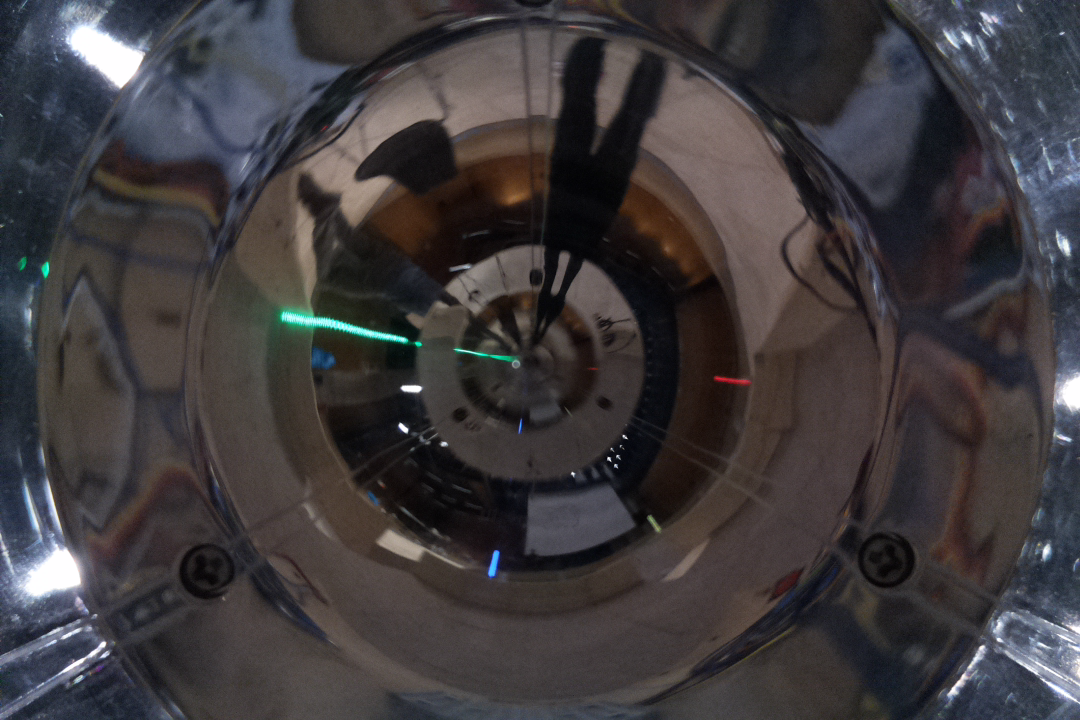

In [31]:
def beacon_main(rawImage):
    start = time.time()
    center_circles = (532, 357)
    center_beacon = (541,357)
    
    height,width,depth = rawImage.shape
    imgWithCircle  = np.zeros((height,width), np.uint8)
    cv2.circle(imgWithCircle,center_circles,225,(255,255,255),thickness=-1)
    cv2.circle(imgWithCircle,center_circles,45,(0,0,0),thickness=-1)
    imask = imgWithCircle>0
    img1 = np.zeros_like(rawImage, np.uint8)
    img1[imask] = rawImage[imask]
    print("First batch circle: ", time.time() - start)
    start = time.time()
    
    imgWithCircle  = np.ones((height,width), np.uint8)
    cv2.circle(imgWithCircle,center_circles,165,(0,0,0),thickness=-1)
    cv2.circle(imgWithCircle,center_circles,75,(255,255,255),thickness=-1)
    imask = imgWithCircle>0
    img = np.zeros_like(img1, np.uint8)
    img[imask] = img1[imask]
    
    print("Second batch circle: ", time.time() - start)
    start = time.time()
    
    ret,thresh_img = cv2.threshold(img,160,0,cv2.THRESH_TOZERO)
    print(find_angles(thresh_img,center_beacon,boundaries))
    angles,lights_coordinates = find_angles(thresh_img,center_beacon,boundaries)
    
    print("Find angle: ", time.time() - start)
    start = time.time()
    
    thresh_img[np.where((thresh_img==[0,0,0]).all(axis=2))] = [160,160,160]
    
    if len(angles) < 3:
        print("less than 3 lights found")
        x, y, a = robot_Instance.Get_Robot_Position()
        return float(x), float(y), float(a)
    if len(angles) == 4:
        x, y, a = robot_Instance.Get_Robot_Position()
        x,y,z = float(x), float(y), float(a)
        if math.sqrt((x-0)**2 + (y-0)**2) < math.sqrt((x-8000)**2 + (y-8000)**2):
            a1,a2,a3 = angles[0],angles[1],angles[2]
            angles = a1,a2,a3
            l1,l2,l3 = lights_coordinates[0],lights_coordinates[1],lights_coordinates[2]
            lights_coordinates = l1,l2,l3
        else:
            a1,a2,a3 = angles[0],angles[1],angles[3]
            angles = a1,a2,a3
            l1,l2,l3 = lights_coordinates[0],lights_coordinates[1],lights_coordinates[3]
            lights_coordinates = l1,l2,l3
    xr,yr,ar = find_robot_pos(angles,lights_coordinates)  
    print("Find robot pos: ", time.time() - start)
    start = time.time()
    
    if xr == -1 or yr == -1 or ar == -1:
        x, y, a = robot_Instance.Get_Robot_Position()
        return float(x), float(y), float(a)
    print("Beacon worked!")
    return xr,yr,ar

boundaries = [
         ([0, 0, 180], [255, 153, 255], 'r', (0,0,255), (0,8000)),
         ([230, 141, 0], [255, 225, 255], 'b', (255,0,0), (8000,0)),
         ([0, 200, 97], [255, 255, 255], 'y', (0,255,255), (0,0)),
         ([77, 235, 0], [220, 244, 255], 'g', (0,255,0), (8000,8000))
    ]

with picamera.PiCamera() as camera:
    camera.resolution = (1080, 720)
    camera.framerate = 60
    camera.shutter_speed = 5000
    stream = io.BytesIO()
    for foo in camera.capture_continuous(stream, format='png', burst=True):
        # Truncate the stream to the current position (in case
        # prior iterations output a longer image)
        start = time.time()
        stream.truncate()
        stream.seek(0)
        file_bytes = np.asarray(bytearray(stream.read()), dtype=np.uint8)
        
        img = cv.imdecode(file_bytes, cv.IMREAD_COLOR)
        print("Time to get image: ", time.time() - start)
        print("position: ",beacon_main(img))
        stream.seek(0)
        print("total time: ", time.time() - start)
        break
filename = "testcam/beacon_4000_4500_180.png"
cv.imwrite(filename, img)
Image(filename = filename)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
import robot as Robot
import  time

robot_Instance= Robot.Robot_Class(0,0,0)


In [ ]:
robot_Instance.Connect_TCP()

Trying to connect


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 3291, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-2ec41826f6a7>", line 1, in <module>
    robot_Instance.Connect_TCP()
  File "/home/pi/STI_Robotic_Competition_Software/Architecture/robot.py", line 55, in Connect_TCP
    self.TCP_Conn, self.TCP_Addr, self.TCP_S = Tcp_Ip.enable_tcp_com(BUFFER_SIZE)
  File "/home/pi/STI_Robotic_Competition_Software/Architecture/TCP_IP.py", line 12, in enable_tcp_com
    conn, addr = s.accept()
  File "/usr/lib/python3.5/socket.py", line 195, in accept
    fd, addr = self._accept()
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2033, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object 

In [4]:
Init=[1500,1750,90,15]
Spot_Init=[Init[0],Init[1],0]
robot_Instance.Set_Robot_Position(Init[0],Init[1],Init[2],Transmission=True)
robot_Instance.Set_Robot_Speed(500, Transmission= True)
robot_Instance.Set_Max_Try_Single_Goal(12)

G92 X1500 Y1750 A0 



In [8]:
robot_Instance.Set_Robot_Position(Init[0],Transmission=True)
robot_Instance.Set_Robot_Position(y=Init[0],Transmission=True)
robot_Instance.Set_Robot_Position(a=Init[0],Transmission=True)


G92 X1500 

G92 Y1500 

G92 A1500 



In [ ]:
robot_Instance.Empty_TCP()
Spot_List =[Spot_Init,[1000,2600,0,15],[6500,2600,0,15],[6500,5000,0,15],[4500,5000,0,15],[4500,7500,0,15],[4500,5000,0,15],[7500,5000,0,15],[7500,500,0,15],[2500,500,0,15],[2500,4000,0,15],[7000,4000,0,15],[7000,1500,0,15],[3500,1500,0,15],[700,3500,0,15],[5500,3500,0,15],[5500,4200,0,15],[700,4200,0,15]]
for Spot in Spot_List:
    Bottle_N=0
    robot_Instance.Sensor_Enabled=Spot[3]
    print('Spot : ', Spot)
    robot_Instance.Clear_Read_Buffer()
    robot_Instance.Clear_Bottle_List()
    robot_Instance.Go_To(Spot[0],Spot[1],Spot[2])
    #Robot is now arrived to a position
    Data=robot_Instance.Get_Data_TCP()#Collect bottles from TCP Communication
    print('Data Received TCP:', Data)
    while Bottle_N<3:#Try to catch 3 Bottle
        List=robot_Instance.Update_Bottle_List(Data)#Update our internal lsit
        Bottle_List= robot_Instance.Get_Bottle_List()
        if Bottle_List!=[]:
            Bottle_X, Bottle_Y, Bottle_Score= robot_Instance.Get_Nearest_Bottle()
            if Bottle_X!=None and Bottle_Y!= None and Bottle_Score!=None:
                Bottle_X_Extended, Bottle_Y_Extended, Valid=robot_Instance.Extend_Coordinate((Bottle_X, Bottle_Y),Distance=800)
                print('Bottle selected:', Bottle_X,Bottle_Y,Bottle_Score, ' Extended', Bottle_X_Extended,Bottle_Y_Extended)
                if Valid:
                    robot_Instance.Go_To(Bottle_X,Bottle_Y,Bottle_Score)
                    robot_Instance.Add_Bottle_Collected()
                    Bottle_N=Bottle_N+1
                else:
                    robot_Instance.Clean_Bottle_Of_Position((Bottle_X, Bottle_Y))
            else:# No more bottle
                print('No bottle')
                break;
        else:
            print("Empty List")
            break;
    if(robot_Instance.Get_Bottle_Collected()>8):
        robot_Instance.Go_To(2000,2000,1)
        robot_Instance.Go_To(1000,1000,0)
        robot_Instance.Go_To(100,100,0, Avoidance=False)
        #Reverse collector
        robot_Instance.Reset_Bottle_Collected()


In [18]:
Init=[1000,1000,0,15]
Spot_Init=[Init[0],Init[1],Init[2], Init[3]]
robot_Instance.Set_Robot_Position(Init[0],Init[1],Init[2],Transmission=True)
time.sleep(0.1)
robot_Instance.Set_Robot_Speed(500, Transmission= True)
time.sleep(0.1)

robot_Instance.Set_Max_Try_Single_Goal(12)
robot_Instance.Empty_TCP()
Spot_List =[Spot_Init,[4000,1000,0,15]]
for Spot in Spot_List:
    Bottle_N=0
    robot_Instance.Sensor_Enabled=Spot[3]
    robot_Instance.Go_To(Spot[0],Spot[1],Spot[2], Avoidance=True)
    print(Spot)


Unconnected
[1000, 1000, 0, 15]
OK: X=7500.00 Y=7700.00 A=90.00 

{'b': 0, 'f': 0, 'c': 0, 'h': 0, 'g': 0, 'm': 0, 'd': 0, 'e': 0, 'l': 0, 'a': 0, 'k': 0, 'j': 0, 'i': 0}
 M0 X7163.50 Y7586.40 A190.61 T1 S0

Timeout
OK: X=1000.00 Y=1000.00 A=0.00 

OK: D_Profil S=500 A=50 B=100 

{'b': 0, 'f': 0, 'c': 0, 'h': 0, 'g': 0, 'm': 0, 'd': 0, 'e': 0, 'l': 1, 'a': 0, 'k': 0, 'j': 0, 'i': 0}
 M0 X2959.17 Y1032.59 A1.07 T2 S2048

Blocked
{'b': 0, 'f': 0, 'c': 0, 'h': 0, 'g': 0, 'm': 0, 'd': 0, 'e': 0, 'l': 0, 'a': 0, 'k': 0, 'j': 0, 'i': 0}
 M0 X2820.51 Y1037.50 A1.10 T1 S0

Timeout
{'b': 0, 'f': 0, 'c': 0, 'h': 0, 'g': 0, 'm': 0, 'd': 0, 'e': 0, 'l': 0, 'a': 0, 'k': 0, 'j': 0, 'i': 0}
 M0 X2940.97 Y1142.29 A73.55 T1 S0

Timeout
{'b': 0, 'f': 0, 'c': 0, 'h': 0, 'g': 0, 'm': 0, 'd': 0, 'e': 0, 'l': 0, 'a': 0, 'k': 0, 'j': 0, 'i': 0}
 M0 X3780.48 Y1124.67 A-27.18 T1 S0

Timeout
{'b': 0, 'f': 0, 'c': 0, 'h': 0, 'g': 0, 'm': 0, 'd': 0, 'e': 0, 'l': 0, 'a': 0, 'k': 0, 'j': 0, 'i': 0}
 M0 X3914.76 Y10

In [20]:
robot_Instance.Go_To_Speed(150,150,3000, Detection=False)

('G1 R150 L150 T3000\r\n', 'M3 H2 S0\r\n')
OK: X=0.00 Y=0.00 A=0.00 

 M0 H2 T2

Blocked


In [3]:
Init=[7500,3000,90,15]
robot_Instance.Set_Robot_Position(Init[0],Init[1],Init[2],Transmission=True)
robot_Instance.Start_Collector()
robot_Instance.Set_Robot_Speed(500, Transmission= True)
robot_Instance.Clear_Read_Buffer()
"""robot_Instance.Go_To_Speed(600,640,20000, Detection=True)#Follow X coordinate
robot_Instance.Go_To_Speed(600,640,20000, Detection=True)
robot_Instance.Go_To_Speed(100,100,800,X_Cal=7600,Y_Cal=200,A_Cal=0, Detection=False, Calibration=True)#Recalibrate Top of the ramp
robot_Instance.Go_To(7000,200,1,Path_Checking=False,Avoidance=False)#Backward
robot_Instance.Go_To(7800,1000,0,Path_Checking=False,Avoidance=False)#Turn left"""

"""robot_Instance.Go_To_Speed(600,640,20000, Detection=True)#Follow Y coordintae
"""
robot_Instance.Go_To_Speed(400,440,20000, Detection=True)
print(robot_Instance.Get_Robot_Position())

robot_Instance.Go_To_Speed(100,100,800,X_Cal=7500,Y_Cal=7700,A_Cal=90, Detection=False, Calibration=True)#Recalibrate Top of the ramp, Step1
robot_Instance.Disable_All_Sensors()
robot_Instance.Go_To(7500,7200,1,Path_Checking=False,Avoidance=False)#Backward
robot_Instance.Go_To(7000,7200,0,Path_Checking=False,Avoidance=False)#Move backward right so we can recalibrate at the top of the ramp
robot_Instance.Go_To_Speed(-320,-300,10000, Detection=True)#Go against wall
robot_Instance.Go_To_Speed(-100,-100,1500,X_Cal=7900,A_Cal=180, Detection=False, Calibration=True)#Recalibrate Corner paltform
robot_Instance.Go_To(5400,7500,0,Path_Checking=False,Avoidance=False)
robot_Instance.Go_To(5400,7000,0,Path_Checking=False,Avoidance=False)#In front of stairs
robot_Instance.Go_To(7000,6500,0,Path_Checking=False,Avoidance=False)
robot_Instance.Go_To(7000,7600,0,Path_Checking=False,Avoidance=False)
robot_Instance.Go_To(5400,7000,0,Path_Checking=False,Avoidance=False)
robot_Instance.Go_To(5400,7600,0,Path_Checking=False,Avoidance=False)
robot_Instance.Go_To(7800,7600,0,Path_Checking=False,Avoidance=False)
robot_Instance.Go_To_Speed(420,400,20000, Detection=True)#Calibrate Top of the ramp
robot_Instance.Go_To_Speed(100,100,1200,X_Cal=7700,Y_Cal=7750,A_Cal=0, Detection=False, Calibration=True)

robot_Instance.Go_To(7300,7750,1,Path_Checking=False,Avoidance=False)
robot_Instance.Go_To(7600,7600,0,Path_Checking=False,Avoidance=False)
robot_Instance.Go_To(7800,7300,0,Path_Checking=False,Avoidance=False)
robot_Instance.Go_To_Speed(120,100,10000, Detection=True)#Downhill
robot_Instance.Go_To_Speed(640,600,20000, Detection=True)
robot_Instance.Go_To_Speed(100,100,800,X_Cal=7800,Y_Cal=300,A_Cal=-90, Detection=False, Calibration=True)
robot_Instance.Go_To(7800,700,1,Path_Checking=False,Avoidance=False)
robot_Instance.Go_To(7000,700,1,Path_Checking=False,Avoidance=False)
robot_Instance.Go_To_Speed(640,600,20000, Detection=True)#Recalibrate Origin
robot_Instance.Go_To_Speed(640,600,20000, Detection=True)#Recalibrate Origin

robot_Instance.Go_To_Speed(100,100,800,X_Cal=200,Y_Cal=300,A_Cal=180, Detection=False, Calibration=True)
robot_Instance.Set_Robot_Speed(150, Transmission= True)

robot_Instance.Reverse_Collector()
robot_Instance.Go_To(1000,300,1,Path_Checking=False,Avoidance=False)
time.sleep(3)
robot_Instance.Stop_Collector()




G92 X7500 Y3000 A90 

('G1 R400 L440 T20000\r\n', 'M3 H2 S15\r\n')
PreParse OK: D_Profil S=500 A=50 B=100 

Message OK: D_Profil S=500 A=50 B=100 

PreParse  M0 H2 T2

PostParse <Result ('2',) {}>
Message  M0 H2 T2

answer Blocked
(7500, 3000, 90)
('G1 R100 L100 T800\r\n', 'M3 H2 S0\r\n')
PreParse  M0 H2 T1

PostParse <Result ('1',) {}>
Message  M0 H2 T1

answer Timeout
Setting pos
G92 X7500 Y7700 A90 

{'h': 0, 'k': 0, 'e': 0, 'i': 1, 'f': 0, 'j': 0, 'b': 0, 'm': 0, 'c': 0, 'g': 0, 'l': 0, 'd': 0, 'a': 0}
Message  M0 X7487.11 Y7391.60 A92.00 T1 S256

Timeout
{'h': 0, 'k': 0, 'e': 0, 'i': 0, 'f': 0, 'j': 0, 'b': 0, 'm': 0, 'c': 0, 'g': 0, 'l': 0, 'd': 0, 'a': 0}
Message  M0 X7335.07 Y7423.38 A182.58 T1 S0

Timeout
('G1 R-320 L-300 T10000\r\n', 'M3 H2 S15\r\n')
PreParse  M0 H2 T2

PostParse <Result ('2',) {}>
Message  M0 H2 T2

answer Blocked
('G1 R-100 L-100 T1500\r\n', 'M3 H2 S0\r\n')
PreParse  M0 H2 T1

PostParse <Result ('1',) {}>
Message  M0 H2 T1

answer Timeout
Setting pos
G92 X7

KeyboardInterrupt: 

In [33]:
robot_Instance.Go_To_Speed(640,600,20000, Detection=True)#Recalibrate Origin
robot_Instance.Go_To_Speed(640,600,20000, Detection=True)#Recalibrate Origin

robot_Instance.Go_To_Speed(100,100,800,X_Cal=200,Y_Cal=300,A_Cal=180, Detection=False, Calibration=True)
robot_Instance.Set_Robot_Speed(150, Transmission= True)

robot_Instance.Reverse_Collector()
robot_Instance.Go_To(1400,300,1,Path_Checking=False,Avoidance=False)
time.sleep(3)
robot_Instance.Stop_Collector()


('G1 R640 L600 T20000\r\n', 'M3 H2 S15\r\n')
PreParse  M0 H2 T2

PostParse <Result ('2',) {}>
Message  M0 H2 T2

answer Blocked
('G1 R640 L600 T20000\r\n', 'M3 H2 S15\r\n')
PreParse  M0 H2 T2

PostParse <Result ('2',) {}>
Message  M0 H2 T2

answer Blocked
('G1 R100 L100 T800\r\n', 'M3 H2 S0\r\n')
PreParse  M0 H2 T1

PostParse <Result ('1',) {}>
Message  M0 H2 T1

answer Timeout
Setting pos
G92 X200 Y300 A180 

Message OK: D_Profil S=150 A=50 B=100 

{'h': 0, 'k': 0, 'e': 0, 'i': 0, 'f': 0, 'j': 1, 'b': 0, 'm': 0, 'c': 0, 'g': 0, 'l': 0, 'd': 0, 'a': 0}
Message  M0 X1339.91 Y293.76 A183.54 T1 S512

Timeout


In [30]:
robot_Instance.Start_Collector()


In [11]:
robot_Instance.Set_Robot_Position(7600,4500,0,Transmission=True)
robot_Instance.Set_Robot_Speed(500, Transmission= True)

In [13]:
robot_Instance.Go_To(7000,4500,1, Avoidance=False)

robot_Instance.Go_To(8500,5000,0, Avoidance=False)

{'k': 0, 'c': 0, 'm': 0, 'h': 0, 'g': 0, 'l': 0, 'b': 0, 'i': 0, 'd': 0, 'a': 0, 'j': 0, 'e': 0, 'f': 0}
 M0 X7364.14 Y4889.43 A133.84 T1 S0

Timeout
{'k': 0, 'c': 0, 'm': 0, 'h': 0, 'g': 0, 'l': 0, 'b': 0, 'i': 0, 'd': 0, 'a': 0, 'j': 0, 'e': 0, 'f': 0}
 M0 X7355.67 Y4937.30 A89.11 T1 S0

Timeout


In [7]:
G1_String='G1 R' + str(round(400))+' L'+str(round(460))+' T'+str(round(10000))+'\r\n'
M3_String='M3 H2 S15' +'\r\n'
All_Commands = (G1_String,M3_String)
#print(All_Commands)
robot_Instance.Send_Messages(All_Commands)
M0_State, Output=robot_Instance.Wait_For_M2_Answer(4)
print(M0_State, Output)


M0 H2 T2

True Blocked


In [31]:
import math
X,Y,A=robot_Instance.Get_Robot_Position()
X_Bottle, Y_Bottle= Bottle_X_Extended, Bottle_Y_Extended
Error_X=X_Bottle-X;
Error_Y=Y_Bottle-Y;
Angle_Des=math.atan2(Error_Y,Error_X)
Angle_Des2=Angle_Des-math.radians(A)
X_New=X_Bottle+math.cos((Angle_Des2))*800
Y_New=Y_Bottle+math.sin((Angle_Des2))*800
print(X,Y)
print(X_New,Y_New)

3990.39 7512.51
3792.3552380456076 7086.044330961104


In [40]:
import math
X,Y,A=4000,8000,90
X_Bottle, Y_Bottle= 4000,7800
Error_X=X_Bottle-X;
Error_Y=Y_Bottle-Y;
Angle_Des=math.atan2(Error_Y,Error_X)

X_New=X_Bottle+math.cos((Angle_Des))*800
Y_New=Y_Bottle+math.sin((Angle_Des))*800
print(X,Y)
print(X_New,Y_New)

2000 0
434.3145750507621 1565.685424949238


In [25]:
Init=[7500,3000,90,15]
robot_Instance.Set_Robot_Position(Init[0],Init[1],Init[2],Transmission=True)
robot_Instance.Start_Collector()
robot_Instance.Set_Robot_Speed(500, Transmission= True)
robot_Instance.Clear_Read_Buffer()
robot_Instance.Go_To_Speed(600,640,20000, Detection=True)#Follow X coordinate
robot_Instance.Go_To_Speed(600,640,20000, Detection=True)
robot_Instance.Go_To_Speed(100,100,800,X_Cal=7600,Y_Cal=200,A_Cal=0, Detection=False, Calibration=True)#Recalibrate Top of the ramp
robot_Instance.Go_To(7000,200,1,Path_Checking=False,Avoidance=False)#Backward
robot_Instance.Go_To(7800,1000,0,Path_Checking=False,Avoidance=False)#Turn left

robot_Instance.Go_To_Speed(600,640,20000, Detection=True)#Follow Y coordintae
robot_Instance.Go_To_Speed(600,640,20000, Detection=True)
print(robot_Instance.Get_Robot_Position())

robot_Instance.Go_To_Speed(100,100,800,X_Cal=7500,Y_Cal=7700,A_Cal=90, Detection=False, Calibration=True)#Recalibrate Top of the ramp, Step1
print('Speed Control Over')
robot_Instance.Disable_All_Sensors()
robot_Instance.Go_To(7500,7300,1,Path_Checking=False,Avoidance=False)#Backward
robot_Instance.Go_To(7200,7300,0,Path_Checking=False,Avoidance=False)#Turn Left
robot_Instance.Go_To_Speed(-400,-400,10000, Detection=True)#Go against wall
robot_Instance.Go_To_Speed(-200,-200,1000,X_Cal=7900,A_Cal=180, Detection=False, Calibration=True)#Recalibrate Corner paltform
robot_Instance.Go_To(5700,7750,0,Path_Checking=False,Avoidance=False)
robot_Instance.Go_To(5400,7000,0,Path_Checking=False,Avoidance=False)
robot_Instance.Go_To(6500,6600,0,Path_Checking=False,Avoidance=False)
robot_Instance.Go_To(7000,7100,0,Path_Checking=False,Avoidance=False)
robot_Instance.Go_To(5600,7100,0,Path_Checking=False,Avoidance=False)
robot_Instance.Go_To(7100,7700,0,Path_Checking=False,Avoidance=False)
robot_Instance.Go_To(7300,7700,0,Path_Checking=False,Avoidance=False)
robot_Instance.Go_To_Speed(200,200,10000, Detection=True)#Downhill
robot_Instance.Go_To_Speed(100,100,800,X_Cal=7600,Y_Cal=7600,A_Cal=0, Detection=False, Calibration=True)
robot_Instance.Go_To(7300,7950,1,Path_Checking=False,Avoidance=False)
robot_Instance.Go_To(7650,7300,0,Path_Checking=False,Avoidance=False)
robot_Instance.Go_To_Speed(110,100,15000, Detection=True)#Downhill
robot_Instance.Go_To_Speed(640,600,20000, Detection=True)
robot_Instance.Go_To_Speed(100,100,800,X_Cal=7800,Y_Cal=300,A_Cal=-90, Detection=False, Calibration=True)
robot_Instance.Go_To(7800,700,1,Path_Checking=False,Avoidance=False)
robot_Instance.Go_To(7000,700,1,Path_Checking=False,Avoidance=False)
robot_Instance.Go_To_Speed(640,600,20000, Detection=True)#Recalibrate Origin
robot_Instance.Go_To_Speed(640,600,20000, Detection=True)#Recalibrate Origin

robot_Instance.Go_To_Speed(100,100,800,X_Cal=200,Y_Cal=300,A_Cal=180, Detection=False, Calibration=True)

robot_Instance.Reverse_Collector()
robot_Instance.Go_To(1000,300,1,Path_Checking=False,Avoidance=False)
time.sleep(10)
robot_Instance.Stop_Collector()


G92 X7500 Y3000 A90 

('G1 R600 L640 T20000\r\n', 'M3 H2 S15\r\n')
PreParse OK: D_Profil S=500 A=50 B=100 

Message OK: D_Profil S=500 A=50 B=100 

PreParse  M0 H2 T2

PostParse <Result ('2',) {}>
Message  M0 H2 T2

answer Blocked
('G1 R600 L640 T20000\r\n', 'M3 H2 S15\r\n')
PreParse  M0 H2 T2

PostParse <Result ('2',) {}>
Message  M0 H2 T2

answer Blocked
('G1 R100 L100 T800\r\n', 'M3 H2 S0\r\n')
PreParse  M0 H2 T1

PostParse <Result ('1',) {}>
Message  M0 H2 T1

answer Timeout
Setting pos
G92 X7600 Y200 A0 

{'h': 0, 'k': 0, 'e': 1, 'i': 1, 'f': 1, 'j': 0, 'b': 0, 'm': 0, 'c': 0, 'g': 0, 'l': 0, 'd': 0, 'a': 0}
Message  M0 X7220.58 Y194.99 A-1.22 T1 S304

Timeout
{'h': 0, 'k': 0, 'e': 1, 'i': 1, 'f': 1, 'j': 0, 'b': 0, 'm': 0, 'c': 0, 'g': 0, 'l': 0, 'd': 0, 'a': 0}
Message  M0 X7702.79 Y745.55 A80.94 T1 S304

Timeout
('G1 R600 L640 T20000\r\n', 'M3 H2 S15\r\n')
PreParse  M0 H2 T2

PostParse <Result ('2',) {}>
Message  M0 H2 T2

answer Blocked
('G1 R600 L640 T20000\r\n', 'M3 H2 S15\r

In [ ]:
robot_Instance.Set_Robot_Position(0,250,90,True)
robot_Instance.Set_Robot_Speed(150)
robot_Instance.Set_Max_Try_Single_Goal(12)

Data=robot_Instance.Get_Data_TCP()
if 

In [26]:
robot_Instance.Reverse_Collector()


In [45]:
robot_Instance.Send_Go_To_Coordinate([2000,1500,500,10000,0])

('G0 X2000 Y1500 T10000 R0\r\n', 'M201 H0 S500\r\n', 'M3 H3\r\n')
